<h1><center><b>Actividad 2: Redes Neuronales en Keras</b></h1></center>


<h4><center> Manuel Julio Romero Olvera &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A01752662  </h4></center>

<h4><center> Cristian Gonzaga López &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  A01745134 </h4></center>

# Practice NN with Keras

In this excercise, you'll learn to configure some additional parameters in Keras, as well as practice building a full neural network to classify MNIST images.

## Weight Initialization

By default, Keras uses Glorot initialization with a uniform distribution. When creating a layer, you can change this via the `kernel_initializer` parameter to either `"he_uniform"`, `"he_normal"` or `"lecun_normal"`.

Additionally, you can define your own initialization scheme through the `VarianceScaling` initializer. For example, we might define a He initialization with a uniform distribution, but based on $fan_{avg}$ instead of $fan_{in}$ like this:

```
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                 distribution='uniform')
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)
```

Documentation: https://keras.io/api/layers/initializers/

## Activation Functions ##

Activation functions can be directly specified by the `activation` argument when creating a layer or added directly as an `ActivationLayer`. Furthermore, built-in activation functions can be passed through their string identifier. The following 3 examples all add a dense 10-neuron layer with a ReLU activation.

```
model.add(keras.layers.Dense(10, activation="relu"))
```
```
model.add(keras.layers.Dense(10, activation=activations.relu))
```
```
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation(activations.relu))
```

You can check all available activation functions here: https://keras.io/api/layers/activations/


## Optimizers ##

We can specify the use of momentum on a simple SGD optimizer via the `momentum` parameter.

```
keras.optimizers.SGD(lr=0.001, momentum=0.9)
```

Further, we can use Nesterov momentum by simply setting the `nesterov` parameter to `True`.

```
keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
```

We can also choose a different optimizer by using the corresponding class.

```
# RMSProp
keras.optimizers.RMSprop(lr=0.001, rho=0.9)

# Adam
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
```

A full list of available optimizers can be found here: https://keras.io/api/optimizers/

## Batch Normalization ##

Batch normalization can be easily used in Keras by simply adding a `BatchNormalization` layer anywhere in your model. Typically we use BN layers before or after a hidden layer's activation function and/or as the first layer of the model.

```
model.add(keras.layers.BatchNormalization())
```

Remember that each BN layer will four parameters per input. Two of those will be non-trainalbe (used only during testing), and two will be trainalbe.

Documentation: https://keras.io/api/layers/normalization_layers/batch_normalization/

## Gradient Clipping ##

To implement gradient clipping in Keras we only need to set the `clipvalue` argument when creating an optimizer. For example, the following code will clip every component of the gradient vector to a value between -1.0 and 1.0.

```
keras.optimizer.SGD(clipvalue=1.0)
```

## Regularization ##

Regularization terms can be simply added to a layer through the `kernel_regularizer` parameter to either `keras.regularizers.l1()`, `keras.regularizers.l2()` or `keras.regularizers.l1_l1()`.

```
keras.layers.Dense(100,activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))
```

## Dropout ##

To implement droput in Keras we simply add a `Dropout` layer before each layer.

```
model.add(keras.layers.Dropout(rate=0.03))
```

Documentation: https://keras.io/api/layers/regularization_layers/dropout/

## Callbacks ##

The `fit()` method accepts a `callbacks` argument that lets specify a list of objects that Keras will call at different intervals (before/after training, each epoch or each batch).

`EarlyStopping`, for instance, will automatically interrupt training when it measures no progress on the validation set for a certain number of epochs, and it will optionally roll back to the best model at the end.

```
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping_cb])
```

Documentation: https://keras.io/api/callbacks/

## Coding Exercise


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

Practice training a deep neural network on the MNIST image dataset:

1. Build a DNN with 20 hidden layers of 100 neurons each (that’s probably too many, but  it’s the point of this exercise). Use `He` initialization and the `ELU` activation function. Remeber to include a `Flatten` layer at the start of your model to flatten the input image from a $(28\times28)$ vector into a $(28*28,1)$ one.

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28,1]))
for i in range(20):
  model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))
  print(f'{i+1} capa añadida')

1 capa añadida
2 capa añadida
3 capa añadida
4 capa añadida
5 capa añadida
6 capa añadida
7 capa añadida
8 capa añadida
9 capa añadida
10 capa añadida
11 capa añadida
12 capa añadida
13 capa añadida
14 capa añadida
15 capa añadida
16 capa añadida
17 capa añadida
18 capa añadida
19 capa añadida
20 capa añadida


2. Using `SGD` optimization with Nesterov momentum and `sparse_categorical_crossentropy` as your loss function, train the network on the MNIST dataset for 30 epochs. You can load it with `keras.datasets.mnist.load_​data()`. The dataset is composed of 70,000 28 × 28–pixel grayscale images (60,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Don't forget to reserve 10% of your data as a validation set.
Experiment with different learning rates and momentums, and compare the results.

In [3]:
model.add(keras.layers.Dense(10,activation='softmax')) # Output layer
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [4]:
mnist = keras.datasets.mnist
# Separamos features (X) y targets (Y).
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() # Dividir en conjunto de entrenamiento y de prueba.

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train = X_train_full / 255.0 # Escalar las imagenes.
y_train = y_train_full
X_test = X_test / 255.0

In [6]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 14s 6ms/step - loss: 0.3983 - accuracy: 0.8800 - val_loss: 0.1992 - val_accuracy: 0.9407
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1794 - accuracy: 0.9472 - val_loss: 0.1637 - val_accuracy: 0.9502
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1305 - accuracy: 0.9608 - val_loss: 0.1466 - val_accuracy: 0.9550
Epoch 4/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1024 - accuracy: 0.9691 - val_loss: 0.1046 - val_accuracy: 0.9690
Epoch 5/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0819 - accuracy: 0.9756 - val_loss: 0.0932 - val_accuracy: 0.9718
Epoch 6/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0694 - accuracy: 0.9787 - val_loss: 0.1080 - val_accuracy: 0.9692
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 0.0950 - val_accuracy

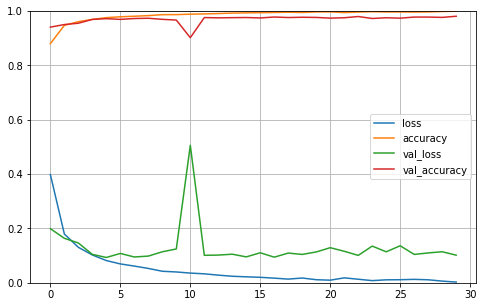

In [7]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Write your observations here**

Se aprecia que el puntaje de precisión de los datos de entrenamiento y validación fueron del 99.93% y 98.07%, respectivamente. Además, la pérdida de los datos de entrenamiento disminuye gradualmente, alcanzando valores más bajos; sin embargo, la pérdida de los datos de validación disminuye hasta alcanzar un punto de inflexión y empieza a subir de nuevo, aunque unos instantes después vuelve a decrecer.

2. Repeat the experiment using `Nadam` optimization and early stopping (with `patience=10`). Does it produce a better model?
Note that since we'll be using early stopping, you can crank up the total number of epochs, knowing that the model won't be overfitted.

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28,1]))
for i in range(20):
  model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))
  print(f'{i+1} capa añadida')

model.add(keras.layers.Dense(10,activation='softmax')) # Output layer
model.compile(optimizer='nadam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

1 capa añadida
2 capa añadida
3 capa añadida
4 capa añadida
5 capa añadida
6 capa añadida
7 capa añadida
8 capa añadida
9 capa añadida
10 capa añadida
11 capa añadida
12 capa añadida
13 capa añadida
14 capa añadida
15 capa añadida
16 capa añadida
17 capa añadida
18 capa añadida
19 capa añadida
20 capa añadida
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 20s 10ms/step - loss: 0.4226 - accuracy: 0.8814 - val_loss: 0.2216 - val_accuracy: 0.9362
Epoch 2/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.2395 - accuracy: 0.9384 - val_loss: 0.1934 - val_accuracy: 0.9513
Epoch 3/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2032 - accuracy: 0.9488 - val_loss: 0.1719 - val_accuracy: 0.9617
Epoch 4/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1779 - accuracy: 0.9565 - val_loss: 0.1374 - val_accuracy: 0.9633
Epoch 5/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1675 - accuracy: 0.9593 - val_loss: 0.1287 - val_accuracy: 0.9713
Epoch 6/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1519 - accuracy: 0.9636 - val_loss: 0.1521 - val_accuracy: 0.9660
Epoch 7/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1400 - accuracy: 0.9674 - val_loss: 0.1339 -

In [10]:
#history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

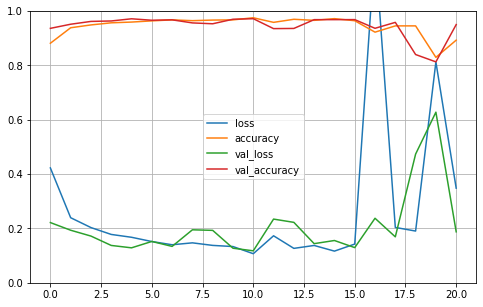

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Write your observations here**

Se aprecia que el puntaje de precisión de los datos de entrenamiento y validación fueron del 89.27% y 95.00%, respectivamente. Además, dichos resultados fueron en $epoch = 21$, deteniendo el modelo en ese instante (pese a que se establecieron originalmente 50) para evitar caer en overfitting. Obteniendo así una precisión inferior a los de la sección anterior, aunque con menor números de *epochs*.

3. Now try adding `BatchNormalization` layers before each hidden layers' activation function (as well as after the `Flatten` layer) and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [12]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28,1]))
for i in range(20):
  model.add(keras.layers.Dense(100,kernel_initializer='he_normal'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ELU())

  print(f'{i+1} capa añadida')

"""
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))
  print(f'{i+1} capa añadida')
"""

model.add(keras.layers.Dense(10,activation='softmax')) # Output layer
model.compile(optimizer='nadam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

1 capa añadida
2 capa añadida
3 capa añadida
4 capa añadida
5 capa añadida
6 capa añadida
7 capa añadida
8 capa añadida
9 capa añadida
10 capa añadida
11 capa añadida
12 capa añadida
13 capa añadida
14 capa añadida
15 capa añadida
16 capa añadida
17 capa añadida
18 capa añadida
19 capa añadida
20 capa añadida
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 elu (ELU)                   (None, 100)               0         
         

In [13]:
#history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 52s 26ms/step - loss: 0.4684 - accuracy: 0.8565 - val_loss: 0.1437 - val_accuracy: 0.9592
Epoch 2/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2830 - accuracy: 0.9166 - val_loss: 0.1463 - val_accuracy: 0.9582
Epoch 3/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2306 - accuracy: 0.9311 - val_loss: 0.1246 - val_accuracy: 0.9645
Epoch 4/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1986 - accuracy: 0.9402 - val_loss: 0.0966 - val_accuracy: 0.9735
Epoch 5/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.1773 - accuracy: 0.9481 - val_loss: 0.1044 - val_accuracy: 0.9703
Epoch 6/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1542 - accuracy: 0.9546 - val_loss: 0.0960 - val_accuracy: 0.9723
Epoch 7/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1409 - accuracy: 0.9583 - val_loss: 0.0958 -

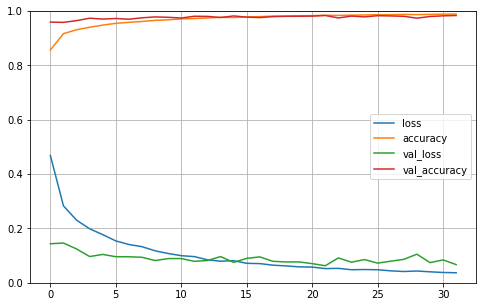

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Write your observations here**

Añadiendo la técnica de *Batch Normalization* se obtuvieron puntajes de precisión del 98.88% y 98.35%. A diferencia del modelo anterior sin dicha técnica, se aumento de manera significativa la precisión de nuestro modelo. Además, dichos resultados se obtuvieron en $epoch = 32$, por lo que demoró más el tiempo de ejecución, aunque no de manera drástica y sus resultados fueron satisfactorios. 

4. Try regularizing the model with dropout by adding a `Dropout` layer after the last hidden layer. See if you can achieve better accuracy.

In [15]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28,1]))
for i in range(20):
  model.add(keras.layers.Dense(100,kernel_initializer='he_normal'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ELU())

  print(f'{i+1} capa añadida')
  """
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))
  print(f'{i+1} capa añadida')
  """

# Adding a dropout layer after the last hidden layer
model.add(keras.layers.Dropout(rate=0.03))

model.add(keras.layers.Dense(10,activation='softmax')) # Output layer
model.compile(optimizer='nadam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

1 capa añadida
2 capa añadida
3 capa añadida
4 capa añadida
5 capa añadida
6 capa añadida
7 capa añadida
8 capa añadida
9 capa añadida
10 capa añadida
11 capa añadida
12 capa añadida
13 capa añadida
14 capa añadida
15 capa añadida
16 capa añadida
17 capa añadida
18 capa añadida
19 capa añadida
20 capa añadida
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 elu (ELU)                   (None, 100)               0         
         

In [16]:
#history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb])


Epoch 1/50
1688/1688 [==============================] - 52s 26ms/step - loss: 0.4677 - accuracy: 0.8568 - val_loss: 0.1409 - val_accuracy: 0.9598
Epoch 2/50
1688/1688 [==============================] - 43s 26ms/step - loss: 0.2858 - accuracy: 0.9154 - val_loss: 0.1560 - val_accuracy: 0.9518
Epoch 3/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2346 - accuracy: 0.9309 - val_loss: 0.1267 - val_accuracy: 0.9653
Epoch 4/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2038 - accuracy: 0.9406 - val_loss: 0.1088 - val_accuracy: 0.9705
Epoch 5/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1839 - accuracy: 0.9450 - val_loss: 0.1239 - val_accuracy: 0.9635
Epoch 6/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1616 - accuracy: 0.9537 - val_loss: 0.1029 - val_accuracy: 0.9713
Epoch 7/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.1495 - accuracy: 0.9567 - val_loss: 0.0893 -

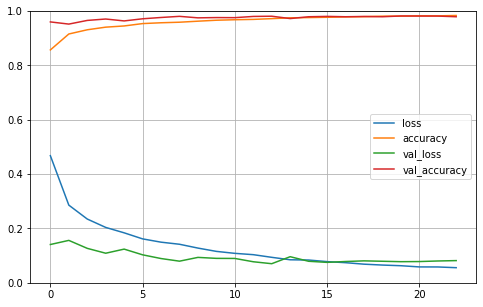

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Write your final observations here**

Fue el mejor modelo en términos de precisión y rápidez de ejecución. Se obtuvieron puntajes del 98.35% y 97.88%. En comparación con el modelo de la sección anterior, disminuyó su precisión en los datos de entramiento un 0.53%. Ahora, también tuvo menor tiempo de ejecución; de hecho, se detuvo en $epoch = 23$. De tal modo que sería pertinente hacer un balance entre sí nos interesa un modelo más rápido, pero un menor puntaje de precisión, o bien, un modelo que demore más, pero tenga una mayor precisión. 